In [1]:
import os
os.getcwd()


'C:\\Users\\ikka\\Desktop\\New folder (4)'

In [3]:
os.getcwd()

'C:\\Users\\ikka\\Desktop\\New folder (4)'

In [4]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [6]:
model=Sequential()

model.add(Conv2D(300,(5,5),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(200,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(70,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)


In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=30,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/30
86/86 [==============================] - ETA: 0s - loss: 0.6426 - accuracy: 0.6252WARNING:tensorflow:From C:\Users\ikka\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\resource_variable_ops.py:1813: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model\assets
86/86 [==============================] - 238s 3s/step - loss: 0.6426 - accuracy: 0.6252 - val_loss: 0.5279 - val_accuracy: 0.7464
Epoch 2/30
86/86 [==============================] - 243s 3s/step - loss: 0.4979 - accuracy: 0.7415 - val_loss: 0.4266 - val_accuracy: 0.8426
Epoch 3/30
86/86 [==============================] - 226s 3s/step - loss: 0.3967 - accuracy: 0.8192 - val_loss: 0.3347 - val_accuracy: 0.8469
Epoch 4/30
86/86 [==============================] - 225s 3s

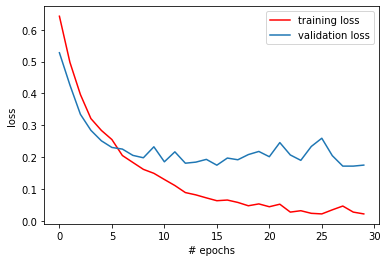

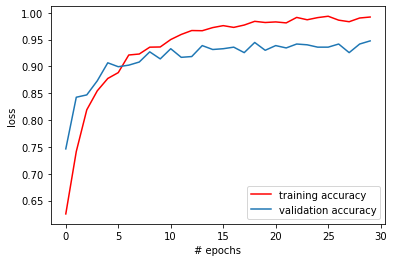

12/12 [==============================] - 11s 883ms/step - loss: 0.2103 - accuracy: 0.9449
[0.21032606065273285, 0.9448819160461426]


In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#%%

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#%%

print(model.evaluate(test_data,test_target))
